In [2]:
import pandas as pd
import glob
import re
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Define the path to the folder containing the CSV files
folder_path = 'Data/POS_daily'

# Use glob to get all CSV files in the folder
csv_files = glob.glob(f'{folder_path}/*.csv')

# Initialize an empty list to store the DataFrames
df_list = []

# Define a regular expression pattern to extract week information from filenames
pattern = re.compile(r'POS__(\d{4}-\d{2}-\d{2})')

# Loop over the list of files and read each file into a DataFrame
for file in csv_files:
    # Extract the date_start and date_end from the filename
    match = pattern.search(file)
    if match:
        date_start = match.groups()[0]

        df = pd.read_csv(file)

        df['date'] = date_start
        df['date'] = pd.to_datetime(df['date'])
        temp_year = df['date'].dt.year
        temp_week = df['date'].dt.isocalendar().week
        df['yearly_week'] = temp_year.astype(str) + '-W' + temp_week.astype(str).str.zfill(2)
        
        df_list.append(df)
    else:
        print(f"mismatch: {file}")

# Concatenate all DataFrames in the list into a single DataFrame
combined_df = pd.concat(df_list)
combined_df.drop('laatst_besteld', inplace=True, axis=1)

combined_df

,gerecht,prijs_€,aantal_bestellingen,date,yearly_week,Something went wrong while creating the file
0,Frikandel speciaal,3.00,35.0,2021-07-01,2021-W26,NaN
1,Frikandel,1.80,32.0,2021-07-01,2021-W26,NaN
2,Friet,2.00,31.0,2021-07-01,2021-W26,NaN
3,Friet speciaal,3.10,23.0,2021-07-01,2021-W26,NaN
4,Friet mayonaise,2.55,21.0,2021-07-01,2021-W26,NaN
...,...,...,...,...,...,...
56,Satérol,2.60,1.0,2024-04-30,2024-W18,NaN
57,Sorbet Mango ananas,4.00,1.0,2024-04-30,2024-W18,NaN
58,Spa Blauw,2.50,1.0,2024-04-30,2024-W18,NaN
59,Speksnack,2.40,1.0,2024-04-30,2024-W18,NaN


In [4]:
combined_df.set_index('date', inplace=True)

<Axes: title={'center': 'Total revenue per day'}, xlabel='date'>

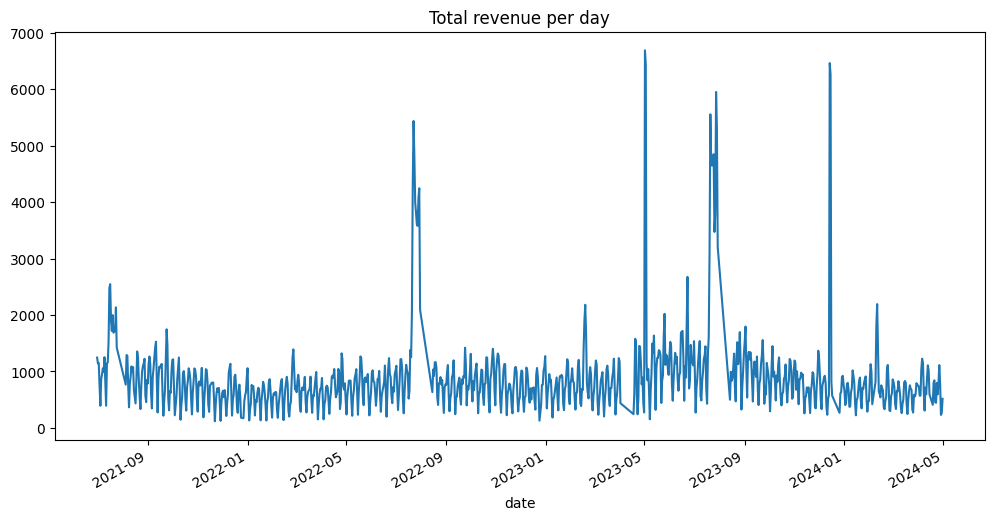

In [9]:
# Group by date and calculate the total revenue for each date
grouped = combined_df.groupby(combined_df.index).apply(
    lambda x: (x['prijs_€'] * x['aantal_bestellingen']).sum()
)

# Convert the resulting Series to a DataFrame and rename the columns
all_revenue = grouped.reset_index(name='total_revenue').rename(columns={'index': 'date'}).to_dict(orient='records')
    
revenue_df = pd.DataFrame(all_revenue)

plt.figure(figsize=(12, 6))
plt.title('Total revenue per day')
# ticks = revenue_df['date'].unique()[::7]
# plt.xticks(ticks, rotation=30, fontsize=10)

revenue_df.groupby('date')['total_revenue'].sum().plot(kind='line')

In [8]:
revenue_df.sort_values('total_revenue', ascending=False)

,date,total_revenue
627,2023-05-02,6686.00
839,2023-12-14,6460.25
628,2023-05-03,6443.30
840,2023-12-15,6259.00
714,2023-07-28,5948.80
...,...,...
173,2022-01-03,132.70
194,2022-01-24,131.45
514,2022-12-24,129.20
140,2021-11-29,125.55


<Axes: title={'center': 'Amount of orders'}, xlabel='date'>

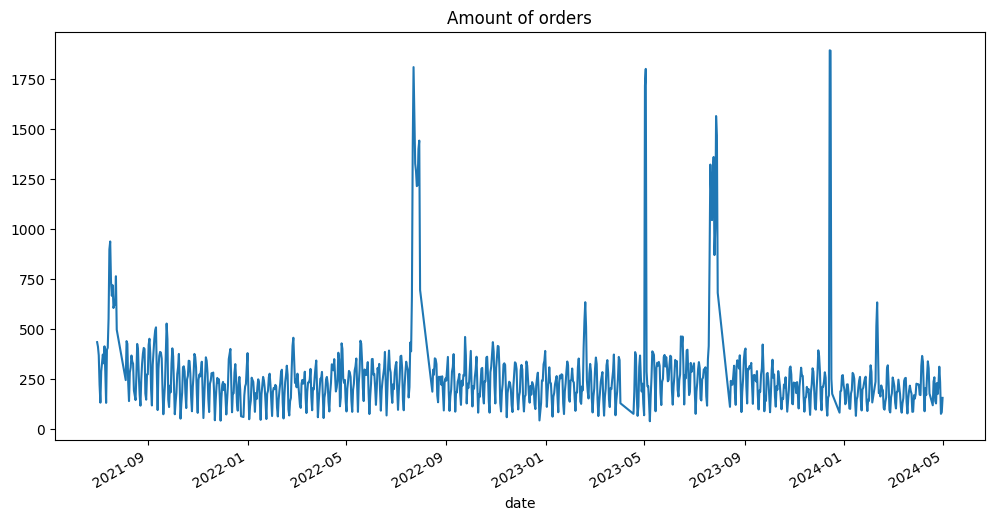

In [6]:
plt.figure(figsize=(12, 6))
plt.title('Amount of orders')
plt.xticks(rotation=180, fontsize=10)

combined_df.groupby('date')['aantal_bestellingen'].sum().plot(kind='line')